In [1]:
# for array computations and laoding data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for data visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# for building and training neural networks
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# supress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


2025-04-15 13:08:40.969512: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 13:08:40.998822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-15 13:08:41.454334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Regression

I will build a model for a regression problem. Tha dataset contains 50 examples of an input feature `X` and its corresponding target `y`.

In [2]:
# load the data
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# convert 1-D arrays into 2-D because the commands later will requiere it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#np. expand dims: Expand the shape of the array.
# Insert a new axis that will appear at the axis position in the expanded array shape

print(f" The shape of the inputs x is : {x.shape}")
print(f" The shape of the inputs y is : {y.shape}")

 The shape of the inputs x is : (50, 1)
 The shape of the inputs y is : (50, 1)


# Visualization

In [3]:
def plot_data(x,y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x,y, marker='x', c='r')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.show()

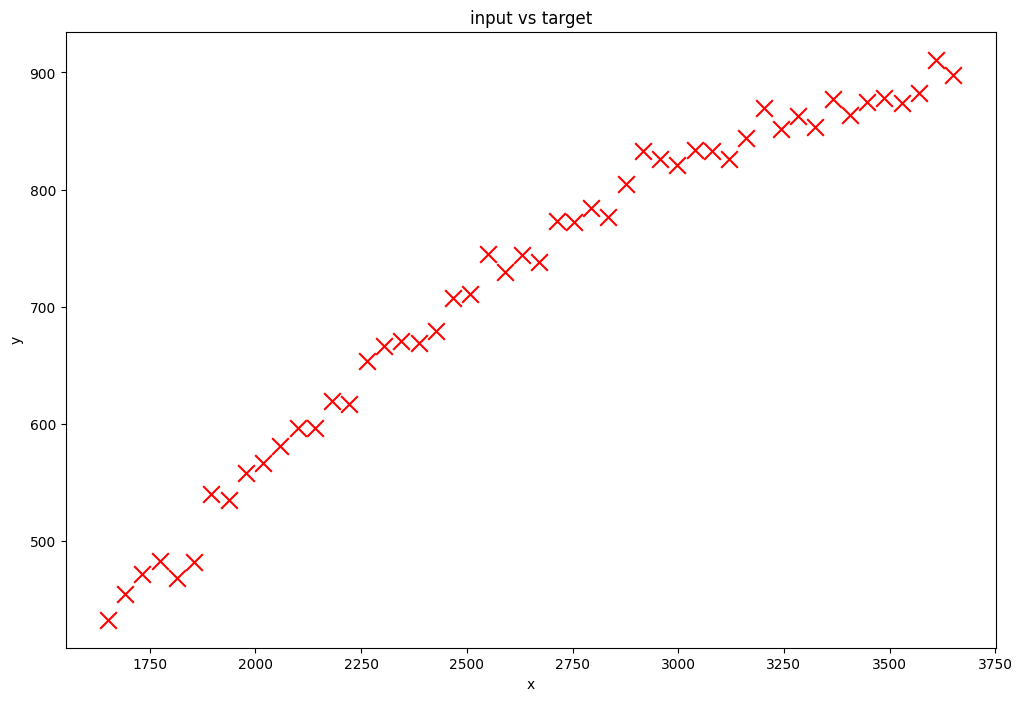

In [4]:
plot_data(x=x,y=y, title="input vs target")

# Split the data (Training, Cross-Validation, Test)

In [5]:
# Get 60 % of the dataset as the training set. Put the remaining 40% in temporary variables x_, y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the training set (input) is: {x_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}\n")
print(f"The shape of the cross validation set (input) is: {x_cv.shape}")
print(f"The shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"The shape of the test set (input) is: {x_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")

The shape of the training set (input) is: (30, 1)
The shape of the training set (target) is: (30, 1)

The shape of the cross validation set (input) is: (10, 1)
The shape of the cross validation set (target) is: (10, 1)

The shape of the test set (input) is: (10, 1)
The shape of the test set (target) is: (10, 1)


### Visualizing how the data was selected

In [6]:
def plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x_train, y_train, marker='X', c='g', label='train')
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cv')
    plt.scatter(x_test, y_test, marker='v', c='m', label='test')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.legend(loc='upper left')
    plt.show()


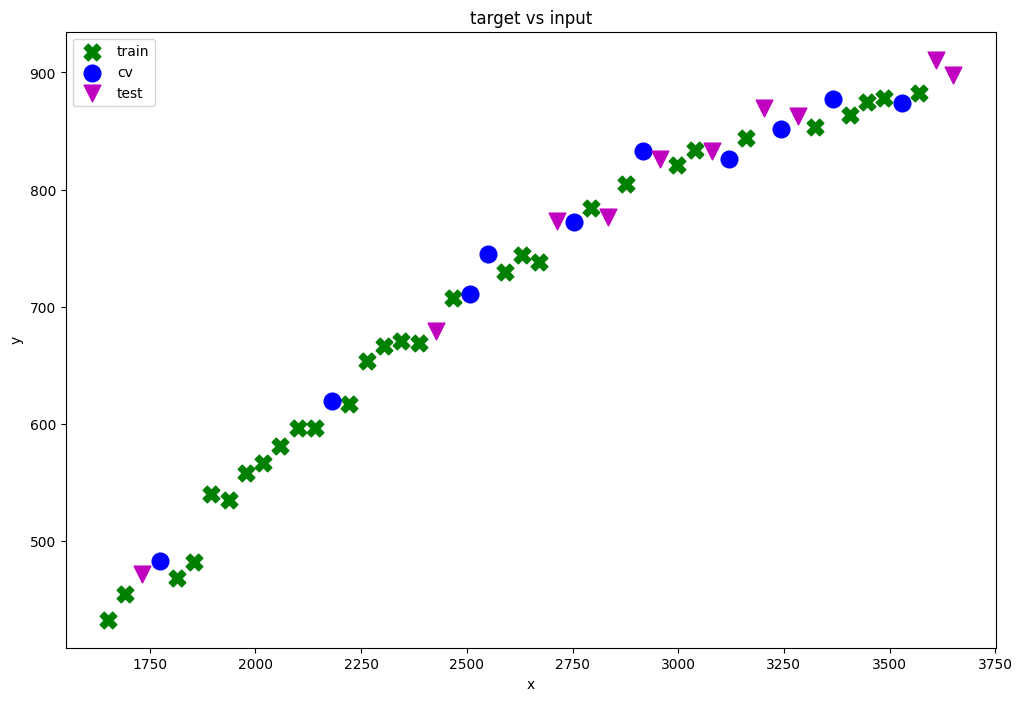

In [7]:
plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title="target vs input")

# Fit a linear model

## Feature Scaling

`StandardScaler` class from scikit-learn computes a z-score:

$$z = \frac{z - \mu}{\sigma}$$

With this class, I will scaling the inputs

In [8]:
#Initialize the class
scaler_linear = StandardScaler()

#Compute the mean and standard deviation of the traininig set, then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


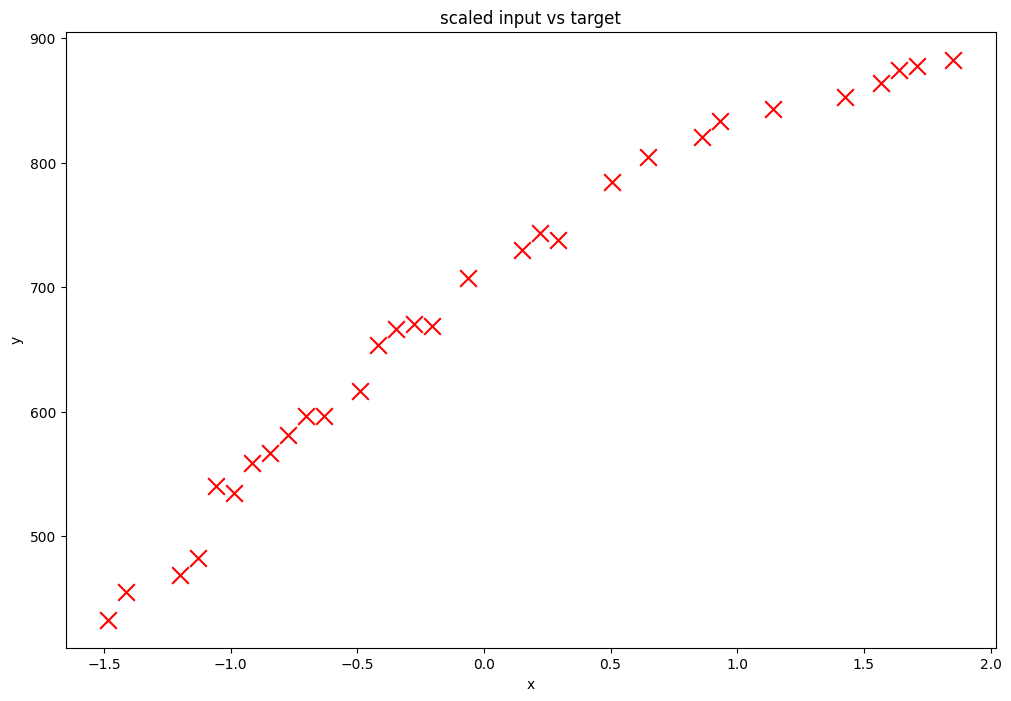

In [9]:

#Plot the results
plot_data(x=X_train_scaled,y=y_train, title="scaled input vs target")


# Train the model

In [10]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

# Evaluate the model

I will measure the error for the training and cross validation sets. For the training error, I will calculate the Mean Squared Error (MSE).

In [11]:
# Feed the scaled training set and get predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# Using loop implementation (to compare the results)

total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i

mse = total_squared_error / (2 * len(yhat))

print(f"Training MSE (for-loop implementation): {mse.squeeze()}")

Training MSE (using sklearn function): 406.19374192533127
Training MSE (for-loop implementation): 406.19374192533127


Now, I can compute the MSE for the cross validation (using the same equation as before).

As with the training set, I should scale the cross validation set. An important thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model.

As before, I will scale the cross validation set below by using the same `StandardScaler`, but only calling its `transform()` method instead of `fit_transform()`.

In [12]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


# Adding tpolynomial features

### Creating additional features

 I will generate the polynomial features from the training set. The `PolinomialFeatures` class will create a new input feature which has the squared values of the input (i.e. degree = 2).

In [13]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is 'x' and right column is 'x^2'
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


Scaling the inputs as before to narrow down the range of values:

In [14]:
#  Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set, then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


## Training the polynomial model

In [15]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train)

# Compute the trainign MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standar deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 87.69841211111911


The MSEs are significantly better for both the training and cross validation set when adding the 2nd order polynomial. So, We want to introduce more polynomial terms and see which one gives the best performance.

## Loop to add polynomial features up to degree=10

In [16]:
# Initialize lists to save the errors, models, and feature transforms

train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.

for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

In [17]:
# Plot the results
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

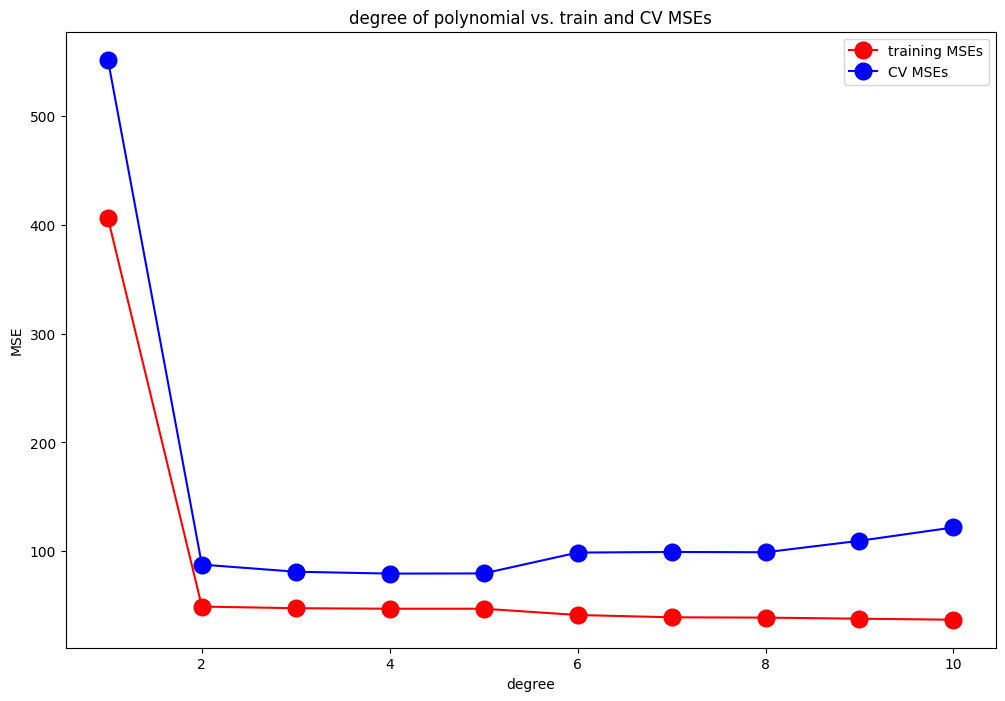

In [18]:
degrees = range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

# Choosing the best model

In [19]:
# Get the model with the lowest CV MSE
degree = np.argmin(cv_mses) + 1
print(f"The lowest CV MSE is foung in the model with degree={degree}")

The lowest CV MSE is foung in the model with degree=4


Now, I can publish teh generalization error by computing the test set's MSE:

In [20]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


# Neural Network

Now, we are going to explore some models using neural network. After that, we will compute the model error and decide which to use.

## Preparing the data

As before, We will use the same training, cross validation, and test sets.

In [21]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

Scaling the features to help gradient descent converge faster.

In [22]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

# Build and train the models

In [23]:
def build_models():
    tf.random.set_seed(20)

    model_1 = Sequential(
        [
            Dense(25, activation='relu'),
            Dense(15, activation='relu'),
            Dense(1, activation='linear'),
        ],
        name = 'model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation='relu'),
            Dense(12, activation='relu'),
            Dense(12, activation='relu'),
            Dense(20, activation='relu'),
            Dense(1, activation='linear'),
        ],
        name = 'model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(4, activation='relu'),
            Dense(12, activation='relu'),
            Dense(1, activation='linear'),
        ],
        name = 'model_3'
    )

    model_list =[model_1, model_2, model_3]

    return model_list

In [24]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models()

# Loop over the models

for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )       

    print("Done!\n")

    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

# Print the results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training model_1...


2025-04-15 13:08:42.389499: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-15 13:08:42.389740: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training model_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Training model_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 73.75, CV MSE: 113.61
Model 3: Training MSE: 9702.85, CV MSE: 10230.57


In [25]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Selected Model: 3
Training MSE: 9702.85
Cross Validation MSE: 10230.57
Test MSE: 13631.78


# Classification

Now, we are going to explore the model evaluation and selection with a classification task.

## Load the data

In [26]:
# Load the data
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D
y_bc = np.expand_dims(y_bc, axis=1)

print(f"The shape of the inputs x is: {x_bc.shape}")
print(f"The shape of the targets y is: {y_bc.shape}")

The shape of the inputs x is: (200, 2)
The shape of the targets y is: (200, 1)


# Visualizing

In [27]:
def plot_bc_dataset(x, y, title):
    for i in range(len(y)):
        marker = 'x' if y[i] == 1 else 'o'
        c = 'r' if y[i] == 1 else 'b'
        plt.scatter(x[i,0], x[i,1], marker=marker, c=c); 
    plt.title("x1 vs x2")
    plt.xlabel("x1"); 
    plt.ylabel("x2"); 
    y_0 = mlines.Line2D([], [], color='r', marker='x', markersize=12, linestyle='None', label='y=1')
    y_1 = mlines.Line2D([], [], color='b', marker='o', markersize=12, linestyle='None', label='y=0')
    plt.title(title)
    plt.legend(handles=[y_0, y_1])
    plt.show()

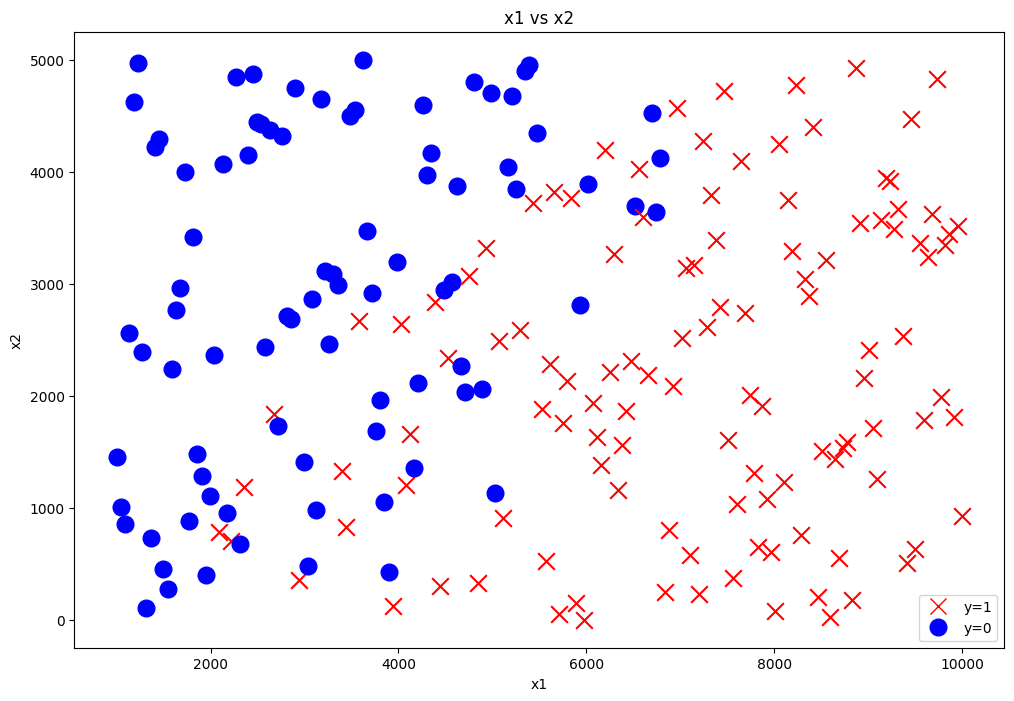

In [28]:
plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs x2")

# Split and Prepare the dataset

In [29]:
# Get 60% of the dataset as thentraining set.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test= train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the training set (input) is: {x_bc_train.shape}")
print(f"The shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"The shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"The shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"The shape of the test set (input) is: {x_bc_test.shape}")
print(f"The shape of the test set (target) is: {y_bc_test.shape}")

The shape of the training set (input) is: (120, 2)
The shape of the training set (target) is: (120, 1)

The shape of the cross validation set (input) is: (40, 2)
The shape of the cross validation set (target) is: (40, 1)

The shape of the test set (input) is: (40, 2)
The shape of the test set (target) is: (40, 1)


In [30]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard variationof the training set, then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

# Evaluatin the error for classification models

In [31]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialiaze counter for misclassified data
misclassifed = 0

# Get number of predictions
num_predicitons = len(predictions)

# Loop for each prediction
for i in range(num_predicitons):

    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:

        # Add one to the counter if the predictions is wrong
        misclassifed += 1
    
# Compute the fraction of the data that the model misclassified
fraction_error = misclassifed / num_predicitons

print(f"Probabilities: {probabilities}")
print(f"Predictions with threshold=0.5: {predictions}")
print(f"Targets: {ground_truth}")
print(f"Fraction of misclassified data (for-loop): {fraction_error}")
print(f"Fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")


Probabilities: [0.2 0.6 0.7 0.3 0.8]
Predictions with threshold=0.5: [0 1 1 0 1]
Targets: [1 1 1 1 1]
Fraction of misclassified data (for-loop): 0.4
Fraction of misclassified data (with np.mean()): 0.4


# Build and Train the model

In [ ]:
# Initialize list that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the model
models_bc = build_models()

# Loop over each model:
for model in models_bc:

    # Setup the loss and optimizer
    model.compile(
            loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )

    print("Done!\n")
    
    # Set the threshold for classification
    treshold = 0.5

    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= treshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassiffied examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= treshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
    )



Training model_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training model_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model 1: Trainins Set Classification Error: 0.05000, CV Set Classification Error: 0.12500
Model 2: Trainins Set Classification Error: 0.07500, CV Set Classification Error: 0.15000
Model 3: Trainins Set Classification Error: 0.07500, CV Set Classification Error: 0.22500


In [38]:
# Select the model with the lowerst error
model_num = 1

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= treshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Selected Model: 1
Training Set Classification Error: 0.0500
CV Set Classification Error: 0.1250
Test Set Classification Error: 0.1750
